1) Carregar base de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('loja.csv')

print(df.to_string())

     Produto Quantidade Preco        Data      Loja
0   Camiseta         10    50  2024-01-10    Centro
1      calça          5   120  2024/01/12    centro
2      Tênis          3   300  12-01-2024  Shopping
3       BONÉ        NaN    35  2024-01-15  shopping
4   Camiseta         10    50  2024-01-10    Centro
5    MoCHiLA          2   NaN  2024-01-20    Centro
6      Tenis          3   abc  2024-01-22  Shopping
7      Calça      cinco   120  2024-01-25    Centro
8        NaN          8    35  2024-01-27  shopping
9    Jaqueta          4   250  2024-01-30       NaN
10    Sueter          3   250  2024-01-30    Centro


2) Remover linhas com células vazias

In [3]:
new_df = df.dropna().copy()
print(new_df.to_string())

     Produto Quantidade Preco        Data      Loja
0   Camiseta         10    50  2024-01-10    Centro
1      calça          5   120  2024/01/12    centro
2      Tênis          3   300  12-01-2024  Shopping
4   Camiseta         10    50  2024-01-10    Centro
6      Tenis          3   abc  2024-01-22  Shopping
7      Calça      cinco   120  2024-01-25    Centro
10    Sueter          3   250  2024-01-30    Centro


3) corrigir formato dos dados

In [4]:
new_df.loc[:,'Data'] = pd.to_datetime(new_df['Data'], format='mixed')
print(new_df.to_string())

     Produto Quantidade Preco                 Data      Loja
0   Camiseta         10    50  2024-01-10 00:00:00    Centro
1      calça          5   120  2024-01-12 00:00:00    centro
2      Tênis          3   300  2024-12-01 00:00:00  Shopping
4   Camiseta         10    50  2024-01-10 00:00:00    Centro
6      Tenis          3   abc  2024-01-22 00:00:00  Shopping
7      Calça      cinco   120  2024-01-25 00:00:00    Centro
10    Sueter          3   250  2024-01-30 00:00:00    Centro


4) Remover linhas duplicadas

In [5]:
new_df = new_df.drop_duplicates()
print(new_df)

     Produto Quantidade Preco                 Data      Loja
0   Camiseta         10    50  2024-01-10 00:00:00    Centro
1      calça          5   120  2024-01-12 00:00:00    centro
2      Tênis          3   300  2024-12-01 00:00:00  Shopping
6      Tenis          3   abc  2024-01-22 00:00:00  Shopping
7      Calça      cinco   120  2024-01-25 00:00:00    Centro
10    Sueter          3   250  2024-01-30 00:00:00    Centro


# Mudar tipo da coluna e criar coluna total no dataframe

In [6]:
new_df.loc[7,'Quantidade'] = 5
new_df.loc[6,'Preco'] = 50
new_df['Quantidade'] = pd.to_numeric(new_df['Quantidade'])
new_df['Preco'] = pd.to_numeric(new_df['Preco'])

new_df['Total'] = new_df['Quantidade'] * new_df['Preco']

print(new_df)

     Produto  Quantidade  Preco                 Data      Loja  Total
0   Camiseta          10     50  2024-01-10 00:00:00    Centro    500
1      calça           5    120  2024-01-12 00:00:00    centro    600
2      Tênis           3    300  2024-12-01 00:00:00  Shopping    900
6      Tenis           3     50  2024-01-22 00:00:00  Shopping    150
7      Calça           5    120  2024-01-25 00:00:00    Centro    600
10    Sueter           3    250  2024-01-30 00:00:00    Centro    750


#Mostrar estatistica descritiva

In [7]:
print(new_df.describe().round(2))

       Quantidade   Preco   Total
count        6.00    6.00    6.00
mean         4.83  148.33  583.33
std          2.71  104.20  254.30
min          3.00   50.00  150.00
25%          3.00   67.50  525.00
50%          4.00  120.00  600.00
75%          5.00  217.50  712.50
max         10.00  300.00  900.00


# Estatistica descritiva do dataframe

In [41]:
print(new_df['Quantidade'].sum())
print(new_df['Quantidade'].count())
print(new_df['Quantidade'].mean())
print(new_df['Quantidade'].max())
print(new_df['Quantidade'].min())

29
6
4.833333333333333
10
3


In [ ]:
# Moda

In [8]:
print(new_df['Quantidade'].mode())

0    3
Name: Quantidade, dtype: int64


In [ ]:
#detalhes das vendas

In [9]:
print("Produto com maior faturamento:", new_df.loc[new_df["Total"].idxmax(), "Produto"])
print("Produto com menor faturamento:", new_df.loc[new_df["Total"].idxmin(), "Produto"])
print(f"total: {new_df['Total'].sum():.2f}")


Produto com maior faturamento: Tênis
Produto com menor faturamento: Tenis
total: 3500.00


In [10]:
print(new_df.groupby("Loja")["Total"].sum())

Loja
Centro      1850
Shopping    1050
centro       600
Name: Total, dtype: int64


In [54]:
print(new_df.groupby("Produto")["Total"].sum())

Produto
Calça       600
Camiseta    500
Sueter      750
Tenis       150
Tênis       900
calça       600
Name: Total, dtype: int64


In [56]:
print(new_df.groupby(["Loja","Produto"])["Total"].sum())

Loja      Produto 
Centro    Calça       600
          Camiseta    500
          Sueter      750
Shopping  Tenis       150
          Tênis       900
centro    calça       600
Name: Total, dtype: int64


In [57]:
new_df.count()

Produto       6
Quantidade    6
Preco         6
Data          6
Loja          6
Total         6
dtype: int64

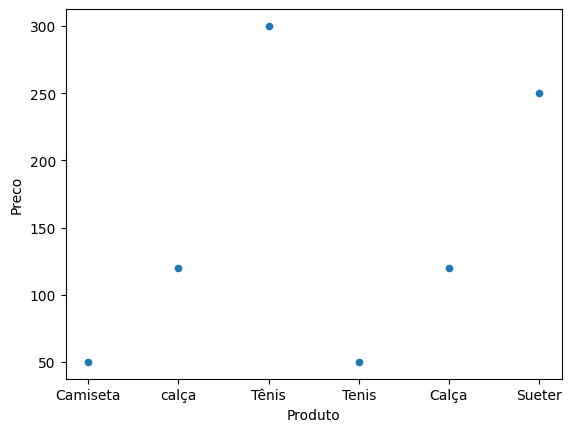

In [11]:
new_df.plot(kind = 'scatter', x = 'Produto', y = 'Preco')
plt.show()

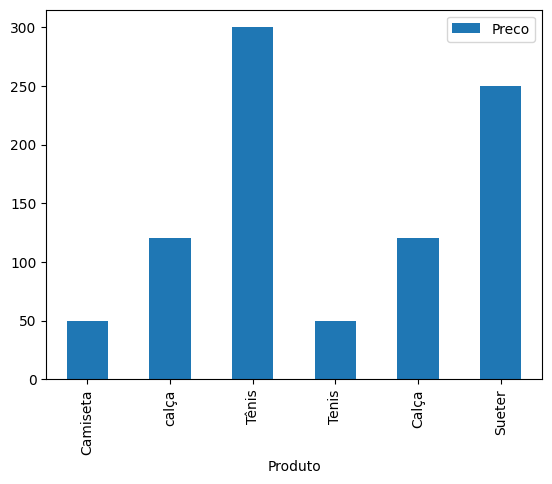

In [25]:
new_df.plot(kind = 'bar', y = ["Preco"], x="Produto")
plt.show()

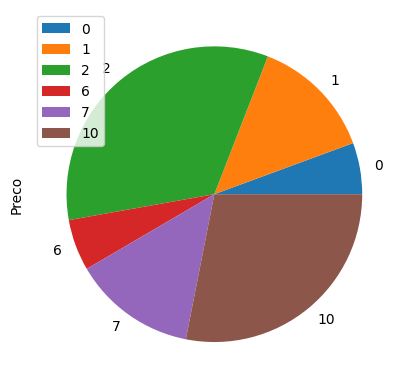

In [28]:
new_df.plot(kind = 'pie', y ="Preco")
plt.show()